<a href="https://colab.research.google.com/github/ShotaSasaki-HCU/Prog2kakushin/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.7089375


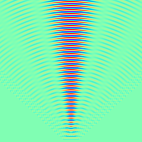

In [39]:
# Numpyの練習
# 2D Phased Array Simulator
# 減衰は考慮しない。

# アニメーション作成機能（確定）
# 計算結果保存機能（確定）

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# A：送信波の振幅(mm)
# f：送信波の周波数(Hz)
# v：送信波の速さ(mm/s)
# t：時間(s)

# range_x_R：x軸方向レンジ右(mm)
# range_x_L：x軸方向レンジ左(mm)
# range_y_T：y軸方向レンジ上(mm)
# range_y_B：y軸方向レンジ下(mm)
# calc_width：計算幅(mm)

def linear_phased_array(A=1, f=40000 * 3, v=340.29*1000, t=0, range_x_R=50, range_x_L=-50, range_y_T=100, range_y_B = 0, calc_width = (v / f) / 4):
  print(calc_width)

  tr_num = 8 # 送信素子数（個）
  tr_directivity = np.deg2rad(95) # 送信素子指向性(rad)
  tr_clearance = (v / f) / 2 # 送信素子間隔(mm)
  tr_x_coord = [] # 送信素子のx座標（y座標は0で固定）

  # 送信素子をx軸上に原点が中心となる様に配置する。それらの座標を計算してtr_x_coordに格納する。
  if (tr_num % 2) == 1: # 送信素子数が奇数個のとき
    for n in range(0, tr_num):
      tr_x_coord.append(-((tr_num // 2) * tr_clearance) + (n * tr_clearance))
  else: # 送信素子数が偶数個のとき
    for n in range(0, tr_num):
      tr_x_coord.append(-(((tr_num // 2) * tr_clearance) - (tr_clearance / 2)) + (n * tr_clearance))

  # ビームフォーミングモード
  beam_direction = np.deg2rad(90) # 合成波の指向方向(rad)

  # 集束モード
  convergent_point = (0, 100) # 集束点の座標
  d_ini = np.linalg.norm(np.array([convergent_point[0], convergent_point[1]]) - np.array([tr_x_coord[0], 0])) # 左端の送信素子と集束点の距離

  # 指定されたレンジを満たす（必要最小限は超える）Numpy２次元配列を0埋めで作成する。
  sim_result = np.zeros((int(np.ceil((range_y_T - range_y_B) / calc_width) + 1), int(np.ceil((range_x_R - range_x_L) / calc_width) + 1)))

  calc_x = range_x_L # 計算するx座標を初期化
  calc_y = range_y_T # 計算するy座標を初期化
  row = 0 # 行インデックス初期化
  column = 0 # 列インデックス初期化
  for num in range(0, tr_num): # 送信素子それぞれについて左端から順次計算していく。
    # phase_diff = num * tr_clearance * np.sin(beam_direction - (np.pi / 2)) # 位相差（距離）（ビームフォーミングモード）
    phase_diff = np.linalg.norm(np.array([convergent_point[0], convergent_point[1]]) - np.array([tr_x_coord[num], 0])) - d_ini # 位相差（距離）（集束モード）
    while calc_y > (range_y_B - calc_width):
      while calc_x < (range_x_R + calc_width):
        vec = np.array([calc_x, calc_y]) - np.array([tr_x_coord[num], 0]) # (計算座標) - (送信素子の座標)
        from_tr = np.arctan2(vec[0], vec[1]) # 送信素子から見た計算座標の向き（y軸が0(rad)で、時計回りが正・反時計回りが負となる。）
        if np.abs(from_tr) <= (tr_directivity / 2): # 計算座標が送信素子の指向性の範囲に入っている場合
          sim_result[row][column] += A * np.sin(2 * np.pi * f * (t - (np.linalg.norm(vec) / v) + (phase_diff / v))) # 波の式
        calc_x += calc_width # 次の計算座標へ（x軸の正方向へ）
        column += 1
      calc_x = range_x_L # 計算するx座標を初期化
      column = 0 # 列インデックス初期化
      calc_y -= calc_width # 次の計算座標へ（y軸の負方向へ）
      row += 1
    calc_y = range_y_T # 計算するy座標を初期化
    row = 0 # 行インデックス初期化

  # # ここからヒートマップの表示設定
  # fig, ax = plt.subplots(figsize=(16, 9), dpi=120)
  # im = ax.imshow(sim_result, cmap='rainbow', aspect='equal', vmin=-A*tr_num, vmax=A*tr_num)
  # plt.colorbar(im)
  # # x軸目盛りの設定
  # ax.set_xticks(np.arange(0, sim_result.shape[1], 1))
  # ax.set_xticklabels(np.linspace(range_x_L, range_x_L+(calc_width*(sim_result.shape[1]-1)), sim_result.shape[1]))
  # ax.xaxis.set_major_locator(ticker.AutoLocator()) # 過剰に指定された目盛りを自動調整
  # ax.xaxis.set_minor_locator(ticker.AutoMinorLocator()) # 副目盛りで主目盛りを自動補完
  # # y軸目盛りの設定
  # ax.set_yticks(np.arange(sim_result.shape[0]-1, 0-1, -1))
  # ax.set_yticklabels(np.linspace(range_y_T-(calc_width*(sim_result.shape[0]-1)), range_y_T, sim_result.shape[0]))
  # ax.yaxis.set_major_locator(ticker.AutoLocator()) # 過剰に指定された目盛りを自動調整
  # ax.yaxis.set_minor_locator(ticker.AutoMinorLocator()) # 副目盛りで主目盛りを自動補完
  # # タイトル・軸ラベルの設定
  # ax.set_title('2D Phased Array Simulator')
  # ax.set_xlabel('x-axis(mm)')
  # ax.set_ylabel('y-axis(mm)')
  # plt.show()

  fig, ax = plt.subplots(figsize=sim_result.shape[::-1], dpi=1, tight_layout=True)
  ax.imshow(sim_result, cmap='rainbow', aspect='equal', vmin=-A*tr_num, vmax=A*tr_num)
  ax.axis('off')
  plt.savefig('image.png', dpi=1)

  return

linear_phased_array()